In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)

### n_jobs @ 2, 1, None makes no impact on stacking_regressor.score

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, n_jobs=2,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f8740b21f40>,
                  n_jobs=2, passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.9902575694531645

In [9]:
stacking_regressor2 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, n_jobs=1,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [10]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f8740b21f40>,
                  n_jobs=1, passthrough=True)

In [11]:
stacking_regressor2.score(X,y)

0.9902575694531645

In [12]:
stacking_regressor3 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [13]:
stacking_regressor3.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f8740b21f40>,
                  passthrough=True)

In [14]:
stacking_regressor3.score(X,y)

0.9902575694531645

### cv=5, cv=5, or None has no impact on stacking_regressor.score

In [15]:
stacking_regressor4 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [16]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f8740b21f40>,
                  passthrough=True)

In [17]:
stacking_regressor4.score(X,y)

0.9901733916207491

In [18]:
stacking_regressor5 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [19]:
stacking_regressor5.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f8740b21f40>,
                  passthrough=True)

In [20]:
stacking_regressor5.score(X,y)

0.9901733916207491

In [21]:
stacking_regressor6 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, passthrough=True)

In [22]:
stacking_regressor6.fit(X,y)

StackingRegressor(estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f8740b21f40>,
                  passthrough=True)

In [23]:
stacking_regressor6.score(X,y)

0.9901733916207491

### scores1, scores2, scores3 --> produce same results (same StackingRegressor + same cv)

### scores4, scores5, scores5 --> produce same results (same StackingRegressor w/default cv for train, same cv for test)

In [24]:
scores1 = cross_validate(stacking_regressor1, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [25]:
scores1

{'fit_time': array([4.18311191, 4.01152396, 4.15482807, 4.11206412, 4.06423807]),
 'score_time': array([0.00476694, 0.00425792, 0.00337887, 0.00465679, 0.00345087]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f871090f910>,
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f871092a790>,
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                     

In [26]:
scores2 = cross_validate(stacking_regressor2, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [27]:
scores2

{'fit_time': array([5.08663988, 5.01161408, 5.14798498, 5.10681009, 5.1094141 ]),
 'score_time': array([0.00480986, 0.0033381 , 0.00472808, 0.00334787, 0.0034318 ]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f8710921eb0>,
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f874119ef40>,
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                     

In [28]:
scores3 = cross_validate(stacking_regressor3, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [29]:
scores3

{'fit_time': array([5.21002698, 5.10406709, 5.32822704, 5.20280814, 5.16146612]),
 'score_time': array([0.0040319 , 0.00342679, 0.00437999, 0.00336099, 0.00345492]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f87411b3940>,
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f87411b3c10>,
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 Gradient

In [30]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [31]:
scores4

{'fit_time': array([5.31976819, 5.41820598, 5.20890403, 5.09383106, 5.09783411]),
 'score_time': array([0.00342393, 0.00349116, 0.00490594, 0.0054841 , 0.00341296]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f87411c1ee0>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f8710a7a130>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f8710a0a730>,
                    passth

In [32]:
scores5 = cross_validate(stacking_regressor5, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [33]:
scores5

{'fit_time': array([5.11801887, 5.13634896, 5.25472617, 5.16916776, 5.28393483]),
 'score_time': array([0.0034101 , 0.00341916, 0.00481391, 0.00344324, 0.00540328]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f8733e23040>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f87411cc250>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f8710bcfd00>,
                    passth

In [34]:
scores6 = cross_validate(stacking_regressor6, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [35]:
scores6

{'fit_time': array([5.21392107, 5.15856981, 5.28906918, 5.16930914, 5.10811186]),
 'score_time': array([0.00343966, 0.00334907, 0.00339699, 0.00549388, 0.00339031]),
 'estimator': [StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f8710aac340>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f8733e08220>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f87109dc3a0>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                          

In [36]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [37]:
cat = evaluate_model(cb, X, y)

In [38]:
cat

,fit_time,score_time,test_score
0,5.964733,0.009559,0.926950
1,5.988338,0.008990,0.898789
2,6.234159,0.010436,0.936517
3,5.948874,0.005330,0.929022
4,6.181976,0.006145,0.950638
5,6.216296,0.008433,0.936688
6,6.040471,0.007522,0.942846
7,5.984842,0.010739,0.926769
8,8.251938,0.016973,0.945508
9,8.213477,0.014199,0.884738


In [39]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [40]:
cat

,cat_score
0,0.926950
1,0.898789
2,0.936517
3,0.929022
4,0.950638
5,0.936688
6,0.942846
7,0.926769
8,0.945508
9,0.884738


In [41]:
g = evaluate_model(gb, X, y)

In [42]:
g

,fit_time,score_time,test_score
0,0.927600,0.002391,0.916466
1,0.941683,0.005687,0.832746
2,0.944184,0.002328,0.913140
3,0.924708,0.003013,0.900737
4,0.935500,0.002491,0.931130
5,0.933896,0.007165,0.911643
6,0.939536,0.002283,0.924417
7,0.925854,0.003141,0.907012
8,0.927999,0.002246,0.926922
9,0.910152,0.002235,0.838528


In [43]:
g = g[['test_score']].rename(columns={'test_score':'gb_score'})

In [44]:
g

,gb_score
0,0.916466
1,0.832746
2,0.913140
3,0.900737
4,0.931130
5,0.911643
6,0.924417
7,0.907012
8,0.926922
9,0.838528


In [45]:
df1 = evaluate_model(stacking_regressor1, X, y)

In [46]:
df1

,fit_time,score_time,test_score
0,12.146556,0.005506,0.924488
1,11.361256,0.011763,0.896521
2,11.320938,0.010545,0.929380
3,11.223534,0.010823,0.920098
4,11.139120,0.012497,0.948507
5,11.570528,0.008050,0.927679
6,11.243501,0.010167,0.936054
7,11.082135,0.011355,0.922235
8,10.692259,0.018951,0.941486
9,10.974570,0.012245,0.878844


In [47]:
df1 = df1[['test_score']].rename(columns={'test_score':'test_score_1'})

In [48]:
df1

,test_score_1
0,0.924488
1,0.896521
2,0.929380
3,0.920098
4,0.948507
5,0.927679
6,0.936054
7,0.922235
8,0.941486
9,0.878844


In [49]:
df2 = evaluate_model(stacking_regressor2, X, y)

In [50]:
df2

,fit_time,score_time,test_score
0,12.965739,0.030000,0.924488
1,12.907638,0.016778,0.896521
2,13.097028,0.008961,0.929380
3,11.287459,0.011932,0.920098
4,11.227351,0.006466,0.948507
5,13.321379,0.005264,0.927679
6,11.427569,0.016012,0.936054
7,11.363052,0.008995,0.922235
8,11.521082,0.014446,0.941486
9,11.400851,0.021303,0.878844


In [51]:
df2 = df2[['test_score']].rename(columns={'test_score':'test_score_2'})

In [52]:
df2

,test_score_2
0,0.924488
1,0.896521
2,0.929380
3,0.920098
4,0.948507
5,0.927679
6,0.936054
7,0.922235
8,0.941486
9,0.878844


In [53]:
df3 = evaluate_model(stacking_regressor3, X, y)

In [54]:
df3

,fit_time,score_time,test_score
0,13.502507,0.007680,0.924488
1,13.425388,0.015802,0.896521
2,13.220956,0.017327,0.929380
3,13.475134,0.008684,0.920098
4,13.367747,0.008028,0.948507
5,13.499271,0.007823,0.927679
6,13.339063,0.008528,0.936054
7,10.385185,0.006147,0.922235
8,9.211378,0.008993,0.941486
9,9.240350,0.005750,0.878844


In [55]:
df3 = df3[['test_score']].rename(columns={'test_score':'test_score_3'})

In [56]:
df3

,test_score_3
0,0.924488
1,0.896521
2,0.929380
3,0.920098
4,0.948507
5,0.927679
6,0.936054
7,0.922235
8,0.941486
9,0.878844


In [57]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [58]:
df4

,fit_time,score_time,test_score
0,11.621370,0.008941,0.920859
1,11.930458,0.008921,0.903301
2,11.801980,0.008174,0.931813
3,11.759465,0.010676,0.924353
4,11.987883,0.008859,0.948466
5,11.870069,0.014918,0.928996
6,11.966556,0.012164,0.939781
7,13.229370,0.014528,0.925835
8,11.856283,0.005620,0.941722
9,11.681013,0.006193,0.886379


In [59]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [60]:
df4

,test_score_4
0,0.920859
1,0.903301
2,0.931813
3,0.924353
4,0.948466
5,0.928996
6,0.939781
7,0.925835
8,0.941722
9,0.886379


In [61]:
df5 = evaluate_model(stacking_regressor5, X, y)

In [62]:
df5

,fit_time,score_time,test_score
0,11.194551,0.005167,0.920859
1,11.355280,0.005648,0.903301
2,11.395222,0.004869,0.931813
3,12.100796,0.007646,0.924353
4,12.014883,0.015551,0.948466
5,12.200887,0.006232,0.928996
6,12.057515,0.007799,0.939781
7,11.909119,0.015946,0.925835
8,10.135092,0.007817,0.941722
9,10.170816,0.005952,0.886379


In [63]:
df5 = df5[['test_score']].rename(columns={'test_score':'test_score_5'})

In [64]:
df5

,test_score_5
0,0.920859
1,0.903301
2,0.931813
3,0.924353
4,0.948466
5,0.928996
6,0.939781
7,0.925835
8,0.941722
9,0.886379


In [65]:
df6 = evaluate_model(stacking_regressor6, X, y)

In [66]:
df6

,fit_time,score_time,test_score
0,11.413384,0.012354,0.920859
1,11.512949,0.008461,0.903301
2,11.604448,0.009897,0.931813
3,11.447888,0.010540,0.924353
4,11.739383,0.017602,0.948466
5,11.726348,0.018384,0.928996
6,11.648211,0.011281,0.939781
7,11.539037,0.008145,0.925835
8,13.876748,0.003749,0.941722
9,14.123925,0.017248,0.886379


In [67]:
df6 = df6[['test_score']].rename(columns={'test_score':'test_score_6'})

In [68]:
df6

,test_score_6
0,0.920859
1,0.903301
2,0.931813
3,0.924353
4,0.948466
5,0.928996
6,0.939781
7,0.925835
8,0.941722
9,0.886379


In [69]:
combo = pd.concat([cat, g, df1, df2, df3, df4, df5, df6], axis=1)

In [70]:
combo

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
0,0.926950,0.916466,0.924488,0.924488,0.924488,0.920859,0.920859,0.920859
1,0.898789,0.832746,0.896521,0.896521,0.896521,0.903301,0.903301,0.903301
2,0.936517,0.913140,0.929380,0.929380,0.929380,0.931813,0.931813,0.931813
3,0.929022,0.900737,0.920098,0.920098,0.920098,0.924353,0.924353,0.924353
4,0.950638,0.931130,0.948507,0.948507,0.948507,0.948466,0.948466,0.948466
5,0.936688,0.911643,0.927679,0.927679,0.927679,0.928996,0.928996,0.928996
6,0.942846,0.924417,0.936054,0.936054,0.936054,0.939781,0.939781,0.939781
7,0.926769,0.907012,0.922235,0.922235,0.922235,0.925835,0.925835,0.925835
8,0.945508,0.926922,0.941486,0.941486,0.941486,0.941722,0.941722,0.941722
9,0.884738,0.838528,0.878844,0.878844,0.878844,0.886379,0.886379,0.886379


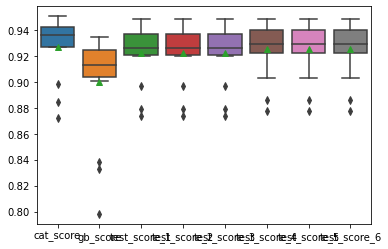

In [72]:
sns.boxplot(data=combo, showmeans=True);

In [73]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926683,0.899726,0.922110,0.922110,0.922110,0.925184,0.925184,0.925184
std,0.023191,0.041473,0.022444,0.022444,0.022444,0.020922,0.020922,0.020922
min,0.872051,0.798137,0.873527,0.873527,0.873527,0.877874,0.877874,0.877874
25%,0.926860,0.903875,0.921167,0.921167,0.921167,0.922606,0.922606,0.922606
50%,0.936517,0.913265,0.925885,0.925885,0.925885,0.928996,0.928996,0.928996
75%,0.942064,0.924419,0.936741,0.936741,0.936741,0.939864,0.939864,0.939864
max,0.950638,0.934496,0.948507,0.948507,0.948507,0.948466,0.948466,0.948466
